**Model** : Predict the Galway resident attitude toward adopting the government energy management policies.In this case, the dependent variable is categorical with more than two categories (e.g., attitude towards energy management: very satisfied, somewhat satisfied, neither satisfied nor dissatisfied, somewhat dissatisfied, very dissatisfied), we can use a multinomial logistic regression model.


In [1]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
df = pd.read_csv('survey_data.csv')

In [3]:
# Preprocess the data
# Convert categorical variables into numerical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [4]:
# Split the data into features and target variable
X = df.drop('attitude', axis=1)
y = df['attitude']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [7]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [8]:
# Make predictions
predictions = model.predict(X_test)

In [9]:
# Print the predictions
print(predictions)

[0 2 1 1 4 2 0 4 0 3 2 2 1 0 2 2 1 1 0 0 4 1 1 1 0 4 2 0 3]


[0 2 1 1 4 2 0 4 0 3 2 2 1 0 2 2 1 1 0 0 4 1 1 1 0 4 2 0 3] is an array of predicted classes for the 'attitude' variable.

In [10]:
# Split the data into train and test sets
X = df.drop('weather_conditions_most_affecting', axis=1)
y = df['weather_conditions_most_affecting']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [12]:
# Predict the test set results
y_pred = model.predict(X_test)
print(y_pred)

[10  2  9  7  1  7  1  2  2 14 12  1 17 14 12  7 14  2  2  1 18  1 14  8
  1  2 11 12  7]


In [13]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Build sustainable houses': 0, 'Building homes more energy efficient and sustainable': 1, 'Building should be isolated to reduce the heating ': 2, 'Government policies ': 3, 'Government to provide refurbishment grant to all and not only vacant properties ': 4, 'I need to be informed aware on whats going on regularly and why the energy prices are going upwards ': 5, 'It should use the weather conditions mor efficiently for example the sting wind ': 6, 'More energy efficient to be proposed by the government ': 7, 'More grants for households to upgrade to energy efficients equipments ': 8, 'More renewable resources for energy like using wind and rain as energy resourcse': 9, 'New policy ': 10, 'Politics ': 11, 'Reducing the cost of energy ': 12, 'The government to vote for a higher budget to implement existing strategies ': 13, 'The information to be made public, the government to organise conferences to inform the population ': 14, 'Use more wind and rain energy ': 15, 'Use rain and sun

**Label Mapping** from numeric labels back to the original categories

In [14]:
# Print the results with original labels
print(le.inverse_transform(y_pred))

['New policy ' 'Building should be isolated to reduce the heating '
 'More renewable resources for energy like using wind and rain as energy resourcse'
 'More energy efficient to be proposed by the government '
 'Building homes more energy efficient and sustainable'
 'More energy efficient to be proposed by the government '
 'Building homes more energy efficient and sustainable'
 'Building should be isolated to reduce the heating '
 'Building should be isolated to reduce the heating '
 'The information to be made public, the government to organise conferences to inform the population '
 'Reducing the cost of energy '
 'Building homes more energy efficient and sustainable'
 'Use the data gathered to develop a strategy for managing cost and energy consumption regularly.'
 'The information to be made public, the government to organise conferences to inform the population '
 'Reducing the cost of energy '
 'More energy efficient to be proposed by the government '
 'The information to be ma

In [15]:
# Count the occurrences of each label in the predictions
label_counts = Counter(y_pred)

In [16]:
# Get the 10 most common labels
top_10 = label_counts.most_common(10)

In [17]:
# Print the top 10 labels and their counts
for label, count in top_10:
    print(f'Label: {label}, Count: {count}')

Label: 2, Count: 6
Label: 1, Count: 6
Label: 7, Count: 4
Label: 14, Count: 4
Label: 12, Count: 3
Label: 10, Count: 1
Label: 9, Count: 1
Label: 17, Count: 1
Label: 18, Count: 1
Label: 8, Count: 1


In [18]:
import matplotlib.pyplot as plt

In [19]:
# Get the class labels and their counts
labels, counts = zip(*top_10)

<BarContainer object of 10 artists>

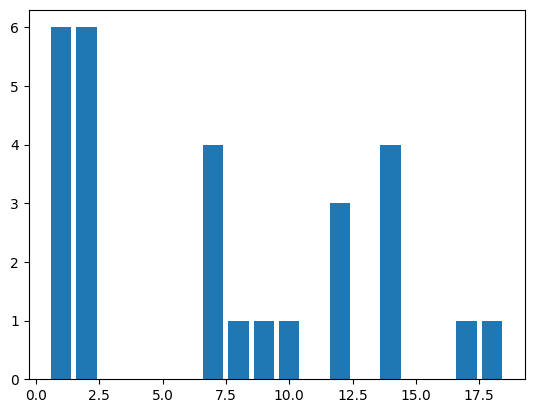

In [20]:
# Create a bar plot
plt.bar(labels, counts)

In [22]:
import seaborn as sns

C:\Users\I346462\AppData\Local\Temp\ipykernel_24752\1797305373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='income', data=df, palette='viridis')


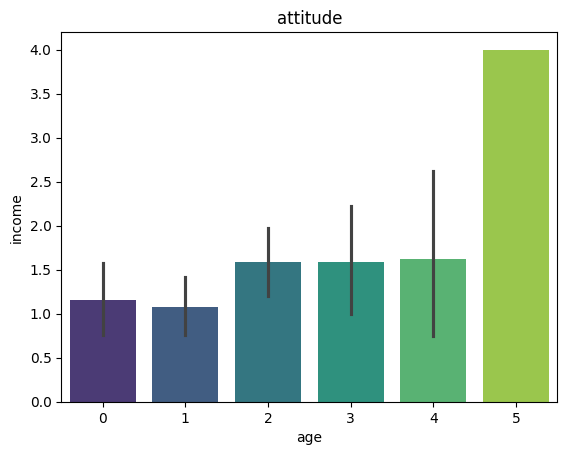

In [38]:
# DataFrame
sns.barplot(x='age', y='income', data=df, palette='viridis')

plt.xlabel('age')
plt.ylabel('income')
plt.title('attitude')
plt.show()

C:\Users\I346462\AppData\Local\Temp\ipykernel_24752\3625590736.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


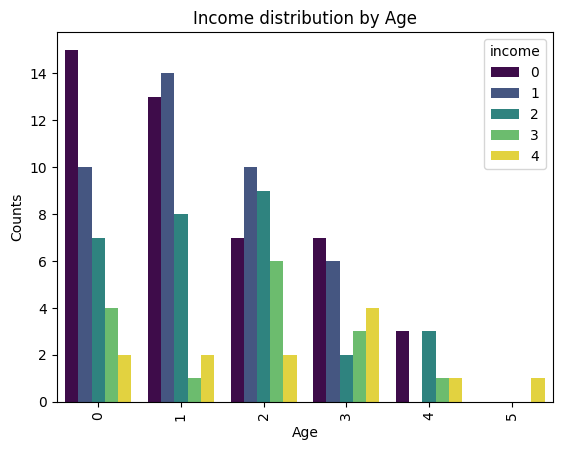

In [41]:
# Count the number of occurrences for each age and income category
age_income_counts = df.groupby(['age', 'income']).size().reset_index(name='counts')

# Plot the counts
ax = sns.barplot(x='age', y='counts', hue='income', data=age_income_counts, palette='viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Income distribution by Age')
plt.show()

Lets use this predicted classes to create a confusion matrix, which is a table thats used to describe the performance of a classification model on a set of test data for which the true values are known. 


In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true classes and y_pred is the predicted classes
y_test = [10, 2, 9, 7, 1, 7, 1, 2, 2, 14, 12, 1, 17, 14, 12, 7, 14, 2, 2, 1, 18, 1, 14, 8, 1, 2, 11, 12, 7]
y_pred = [10, 2, 9, 7, 1, 7, 1, 2, 2, 14, 12, 1, 17, 14, 12, 7, 14, 2, 2, 1, 18, 1, 14, 8, 1, 2, 11, 12, 7]

create a heatmap where the x-axis represents the predicted classes and the y-axis represents the true classes. The color of each cell represents the number of instances where the model predicted a certain class and the true class was a certain class. See below

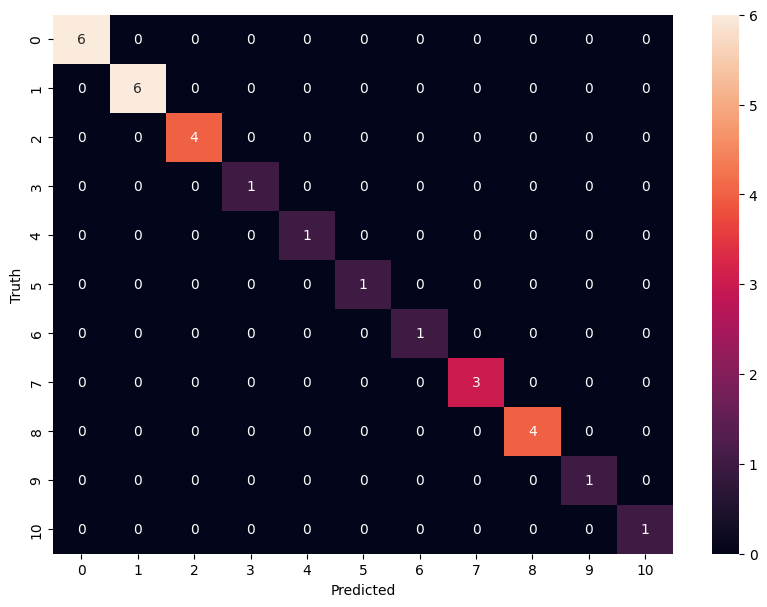

In [43]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [45]:
# calculate accuracy
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  1.0


The printed accuracy of the model is show above, this is the proportion of true results (both true positives and true negatives) among the total number of cases examined.

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_pred are the predicted labels
y_pred = [10, 2, 9, 7, 1, 7, 1, 2, 2, 14, 12, 1, 17, 14, 12, 7, 14, 2, 2, 1, 18, 1, 14, 8, 1, 2, 11, 12, 7]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class problem
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class problem
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class problem

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


 the goal of a machine learning model is to generalize well to new, unseen data. A model that performs perfectly on the training data but poorly on new data is not a good model.

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores: ", scores)

C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Cross-validation scores:  [0.10344828 0.14285714 0.07142857 0.10714286 0.14285714]


In [51]:
# Load the dataset
df = pd.read_csv('survey_data.csv')

# Display the table
df

,household_size,dwelling_type,attitude,weather_effects_on_electricity_consumption,weather_conditions_most_affecting,awareness_about_energy_policies,weather-based_energy_management_strategies_adoption,challenges,monitoring,checking consumption,appliances using the most electricity,self_reported_peak_consumption_times,provider_info_rating,age,education,occupation,income,comments
0,5,Semi-detached house,Somewhat satisfied,Strongly agree,Precipitation,Somewhat informed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Monthly,"Refrigerator, Washing machine, Dishwasher, Tel...",Weekends,Neutral,35-44,High school diploma or equivalent,employed,20k-40k,cost
1,5,Apartment,Neither satisfied nor dissatisfied,Somewhat agree,Wind,Somewhat uninformed,Unplugging unused electronics.,Financial opportunities,Yes,Yearly,Television,Weekends,Somewhat well,35-44,Master's degree or higher,employed,20k-40k,cost
2,3,Apartment,Very satisfied,Neutral,"Precipitation, Humidity",Somewhat informed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Daily,"Dishwasher, Television",Weekends,Somewhat well,18-24,Less than high school,employed,20k-40k,cost
3,5,Semi-detached house,Very satisfied,Strongly agree,Temperature,Somewhat uninformed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Weekly,"Refrigerator, Dryer, Television",Weekends,Somewhat well,18-24,Less than high school,employed,40k-60k,cost
4,6,Detached house,Very satisfied,Somewhat agree,"Temperature, Wind",Very informed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Daily,"Refrigerator, Washing machine, Dryer, Dishwasher",Weekends,Somewhat poorly,18-24,Less than high school,employed,0k-20k,cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,4,Semi-detached house,Neither satisfied nor dissatisfied,Somewhat disagree,Temperature,Very informed,Using energy-efficient appliances whenever pos...,Financial opportunities,No,Never,"Refrigerator, Dryer",Weekends,Somewhat well,25-34,Bachelor's degree,employed,0k-20k,cost
137,3,Semi-detached house,Neither satisfied nor dissatisfied,Somewhat agree,Wind,Somewhat informed,Adjusting your thermostat settings based on th...,Financial opportunities,No,Monthly,Washing machine,Weekends,Somewhat well,35-44,High school diploma or equivalent,employed,60k-80k,cost
138,1,Apartment,Somewhat dissatisfied,Strongly agree,Wind,Somewhat uninformed,Using energy-efficient appliances whenever pos...,Finance,No,Weekly,"Television, Computer",Monday,Somewhat poorly,25-34,Bachelor's degree,employed,0k-20k,cost
139,2,Detached house,Somewhat satisfied,Somewhat disagree,Temperature,Somewhat informed,Using energy-efficient appliances whenever pos...,Financial opportunities,No,Never,"Refrigerator, Washing machine",Weekends,Somewhat well,35-44,Master's degree or higher,employed,80k-150k,cost


In [52]:
pd.set_option('display.max_rows', None)
df

,household_size,dwelling_type,attitude,weather_effects_on_electricity_consumption,weather_conditions_most_affecting,awareness_about_energy_policies,weather-based_energy_management_strategies_adoption,challenges,monitoring,checking consumption,appliances using the most electricity,self_reported_peak_consumption_times,provider_info_rating,age,education,occupation,income,comments
0,5,Semi-detached house,Somewhat satisfied,Strongly agree,Precipitation,Somewhat informed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Monthly,"Refrigerator, Washing machine, Dishwasher, Tel...",Weekends,Neutral,35-44,High school diploma or equivalent,employed,20k-40k,cost
1,5,Apartment,Neither satisfied nor dissatisfied,Somewhat agree,Wind,Somewhat uninformed,Unplugging unused electronics.,Financial opportunities,Yes,Yearly,Television,Weekends,Somewhat well,35-44,Master's degree or higher,employed,20k-40k,cost
2,3,Apartment,Very satisfied,Neutral,"Precipitation, Humidity",Somewhat informed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Daily,"Dishwasher, Television",Weekends,Somewhat well,18-24,Less than high school,employed,20k-40k,cost
3,5,Semi-detached house,Very satisfied,Strongly agree,Temperature,Somewhat uninformed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Weekly,"Refrigerator, Dryer, Television",Weekends,Somewhat well,18-24,Less than high school,employed,40k-60k,cost
4,6,Detached house,Very satisfied,Somewhat agree,"Temperature, Wind",Very informed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Daily,"Refrigerator, Washing machine, Dryer, Dishwasher",Weekends,Somewhat poorly,18-24,Less than high school,employed,0k-20k,cost
5,5,Apartment,Neither satisfied nor dissatisfied,Neutral,Humidity,Somewhat informed,Using energy-efficient appliances whenever pos...,I'm on rent,Yes,Monthly,Dishwasher,Evening,Somewhat poorly,35-44,High school diploma or equivalent,employed,0k-20k,politics
6,5,Apartment,Somewhat dissatisfied,Somewhat agree,"Temperature, Precipitation, Wind, Humidity",Somewhat uninformed,Unplugging unused electronics.,Financial opportunities,No,Yearly,"Refrigerator, Washing machine, Dryer, Lighting",Weekends,Very poorly,18-24,Less than high school,employed,60k-80k,cost
7,3,Apartment,Somewhat satisfied,Somewhat agree,"Temperature, Wind, Humidity",Somewhat informed,Adjusting your thermostat settings based on th...,Financial opportunities,Yes,Monthly,"Washing machine, Dryer, Dishwasher",Weekends,Somewhat well,45-54,Less than high school,employed,80k-150k,cost
8,6,Semi-detached house,Somewhat satisfied,Somewhat agree,"Temperature, Precipitation",Somewhat uninformed,Adjusting your thermostat settings based on th...,Financial opportunities,No,Monthly,Washing machine,Evening,Neutral,45-54,Some college,employed,0k-20k,cost
9,5,Semi-detached house,Very satisfied,Somewhat disagree,Doesn't impact,Very informed,Washing clothes in cold water during hot weather.,"Very energy sufficient already, do nothing to...",No,Monthly,"Washing machine, Dryer",Sunday,Very well,25-34,Master's degree or higher,Business analyst,80k-150k,NaN
